[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AxelSkrauba/Taller_Signals/blob/main/1_Introduccion_librerias/Introducción_al_uso_de_NumPy_y_Matplotlib.ipynb)

# Introducción al uso de NumPy y Matplotlib en Python

# ¿Qué es NumPy?

NumPy es una biblioteca en Python que proporciona soporte para arrays multidimensionales y matrices, junto con una amplia gama de funciones matemáticas para operar en estos arrays.

**Ventajas de usar NumPy**
* Eficiencia: NumPy utiliza implementaciones optimizadas en C, lo que lo hace más rápido que las operaciones equivalentes en Python puro.
* Funcionalidad matemática avanzada: NumPy proporciona una variedad de funciones para realizar operaciones matemáticas complejas en arrays.
* Indexación avanzada: Permite una indexación potente y versátil en arrays multidimensionales.

## Ejemplo

In [ ]:
import numpy as np

# Crear arrays
a = np.array([1, 2, 3, 4, 5])   # Notar que como argumento tenemos "literal" una lista de Python
                                # El concepto de arreglo en numpy es similar
                                # Viene con un plus de velocidad, métodos y propiedades
                                # para tareas recurrentes en vectores y matrices (optimizado)

b = np.arange(0, 10, 2)         # Array de 0 a 8 con paso 2
                                # Equivalente al range de Python.

In [ ]:
a

array([1, 2, 3, 4, 5])

In [ ]:
print(a)
print(b)

[1 2 3 4 5]
[0 2 4 6 8]


In [ ]:
# Un pequeño ejemplo de esta "funcionalidad extra"
# Operaciones matemáticas
c = a + b     # Realiza la suma elemento a elemento, tomando el índice de cada arreglo
              # Para hacer esto con listas de Python, se necesita implementar bucles
print("Array resultante de la suma:", c)

Array resultante de la suma: [ 1  4  7 10 13]


In [ ]:
# Más ejemplos
d = np.sin(a)
e = np.dot(a, b)

# Funciones estadísticas
mean_a = np.mean(a)
max_b = np.max(b)

print("Array resultante de aplicar seno:", d)
print("Producto punto de a y b:", e)
print("Media de a:", mean_a)
print("Valor máximo de b:", max_b)

Array resultante de aplicar seno: [ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427]
Producto punto de a y b: 80
Media de a: 3.0
Valor máximo de b: 8


## Test de Eficiencia

In [ ]:
# Tamaño de las matrices a evaluar: DIM x DIM
DIM = 400

# Matrices de entrada
a = np.random.rand(DIM, DIM)
b = np.random.rand(DIM, DIM)

Producto escalar o producto punto.

Se aplica sobre 2 matrices cuadradas de dimensión DIM.

**REPASO:**

Dos matrices **A** y **B** se dicen multiplicables si el número de columnas de **A** coincide con el número de filas de **B**.

image.png

Ejemplo

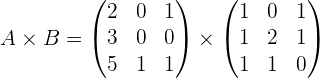

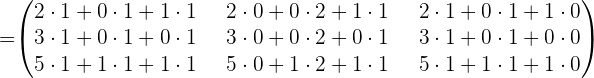

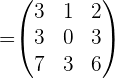

In [ ]:
# Si DIM=400, tenemos 400^3 operaciones -> 64.000.000. Esto nos da una idea del "coste" o "complejidad" de nuestro algoritmo.
def cpu_by_python(a, b, DIM=DIM):
    result = np.zeros((DIM, DIM))
    for i in range(DIM):
        for j in range(DIM):
            for k in range(DIM):
                result[i,j] += a[i,k] * b[k,j]
    return result

In [ ]:
def cpu_by_numpy(a, b):
    return np.dot(a,b)

### Ejecuciones simples
Medir el tiempo, no es la manera más óptima de evaluar comparativamente distintas implementaciones. Depende del hardware, de otros procesos en ejecución, etc. Pero resulta bastante intuitivo.

In [ ]:
from timeit import default_timer as timer

inicio = timer()
result_1 = cpu_by_python(a, b)
total_1 = timer()-inicio
print("CPU Python: {} s".format(total_1))

CPU Python: 54.31805598400001 s


In [ ]:
inicio = timer()
result_2 = cpu_by_numpy(a, b)
total_2 = timer()-inicio
print("CPU Numpy: {} s".format(total_2))

CPU Numpy: 0.009359700000004523 s


### Comparaciones
Notar que, según la ejecución, las comparaciones pueden resultar considerablemente diferentes. Esto se debe a la manera rudimentaria de comparar los costes, mediante medición simple de tiempos.

In [ ]:
print("### Numpy vs Python ###")
print("Numpy es {} veces más rápido que Python ('puro')". format(round(total_1/total_2, 2)))

### Numpy vs Python ###
Numpy es 5803.4 veces más rápido que Python ('puro')


### Estadísticas en las ejecuciones

Se ejecutan varias veces las funciones, para estimar un consumo más preciso del tiempo empleado.
Con esto se obtiene una media del tiempo de ejecución, e información respecto a la dispersión entre ensayos.

In [ ]:
%%timeit
result_1 = cpu_by_python(a, b)

52 s ± 919 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
result_2 = cpu_by_numpy(a, b)

6.46 ms ± 1.85 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


# ¿Qué es Matplotlib?

Matplotlib es una biblioteca para crear visualizaciones estáticas, animadas e interactivas en Python. Nos permite crear gráficos, histogramas, gráficos de dispersión, entre otros.

**Ventajas de usar Matplotlib**
* Facilidad de uso: Matplotlib proporciona una interfaz sencilla para crear una amplia variedad de gráficos con solo unas pocas líneas de código.
* Personalización: Ofrece un alto grado de control sobre la apariencia de los gráficos.
* Compatibilidad con NumPy: Matplotlib funciona de manera excelente con los arrays de NumPy.

### Ejemplo

In [ ]:
import matplotlib.pyplot as plt

# Datos
x = np.linspace(0, 10, 100)     # Genera un array de 100 elementos entre 0 y 10
                                # Es decir, valores equiespaciados entre el intervalo deseado
                                # Con el range de python, se generan enteros solamente. Entre otras ventajas

y = np.sin(x)
                                # Cómo variable dependiente, el seno de los valores
                                # Se aplica elemento a elemento. Método de numpy y sus ventajas.

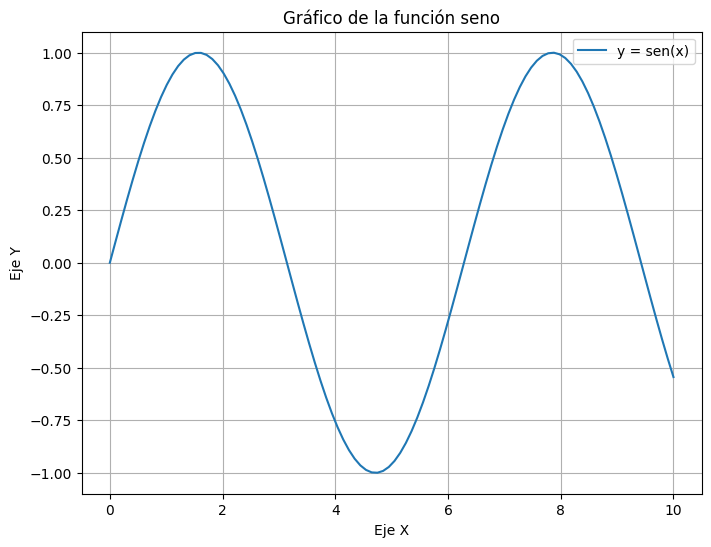

In [ ]:
# Crear el gráfico
plt.figure(figsize=(8, 6))    # Para definir un tamaño personalizado de la gráfica. No es necesario
plt.plot(x, y, label='y = sen(x)')
plt.title('Gráfico de la función seno')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.grid(True)
plt.show()

¿Qué pasa si en el rango de 0 a 10 uso pocos puntos? 10 por ejemplo

### Ejemplo 2

In [ ]:
x = np.linspace(-10, 10, 100)
y = x**2

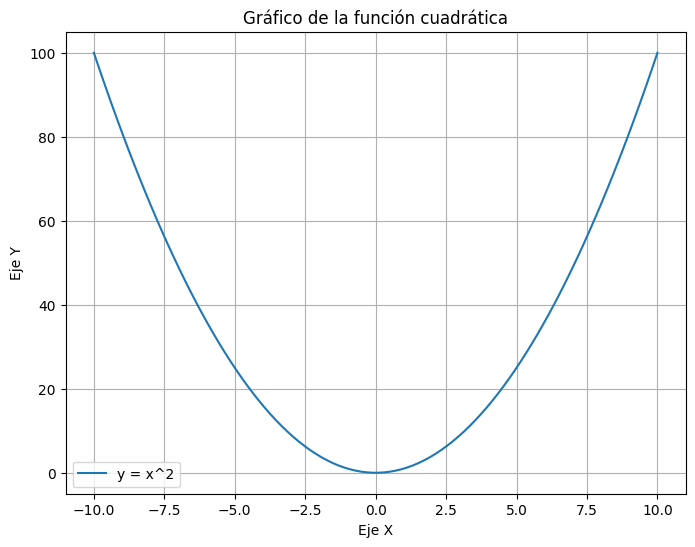

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='y = x^2')
plt.title('Gráfico de la función cuadrática')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.grid(True)
plt.show()

### Ejemplo 3

In [ ]:
x = np.linspace(0, 4, 20)
y1 = x**2
y2 = 2*x

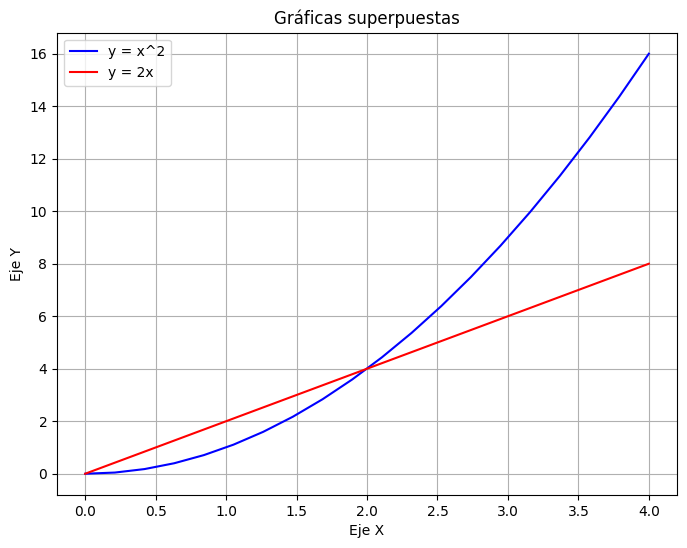

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='y = x^2', color='blue')
plt.plot(x, y2, label='y = 2x', color='red')
plt.title('Gráficas superpuestas')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.grid(True)
plt.show()

Si, por ejemplo, se quisiera resolver:

`x^2 = 2*x`

En la gráfica, se tienen los 2 valores de X que satisfacen la igualdad.

### Ejemplo 4

Gráfica comparativa del rendimiento para Numpy

In [ ]:
TEST = 50
STEPS = 6
times = []
for i in range(TEST, TEST*STEPS, TEST):
    a = np.random.rand(i, i)
    b = np.random.rand(i, i)

    inicio = timer()
    cpu_by_python(a, b, i)
    total_1 = timer()-inicio

    inicio = timer()
    result_2 = cpu_by_numpy(a, b)
    total_2 = timer()-inicio

    times.append((i, (total_1, total_2)))

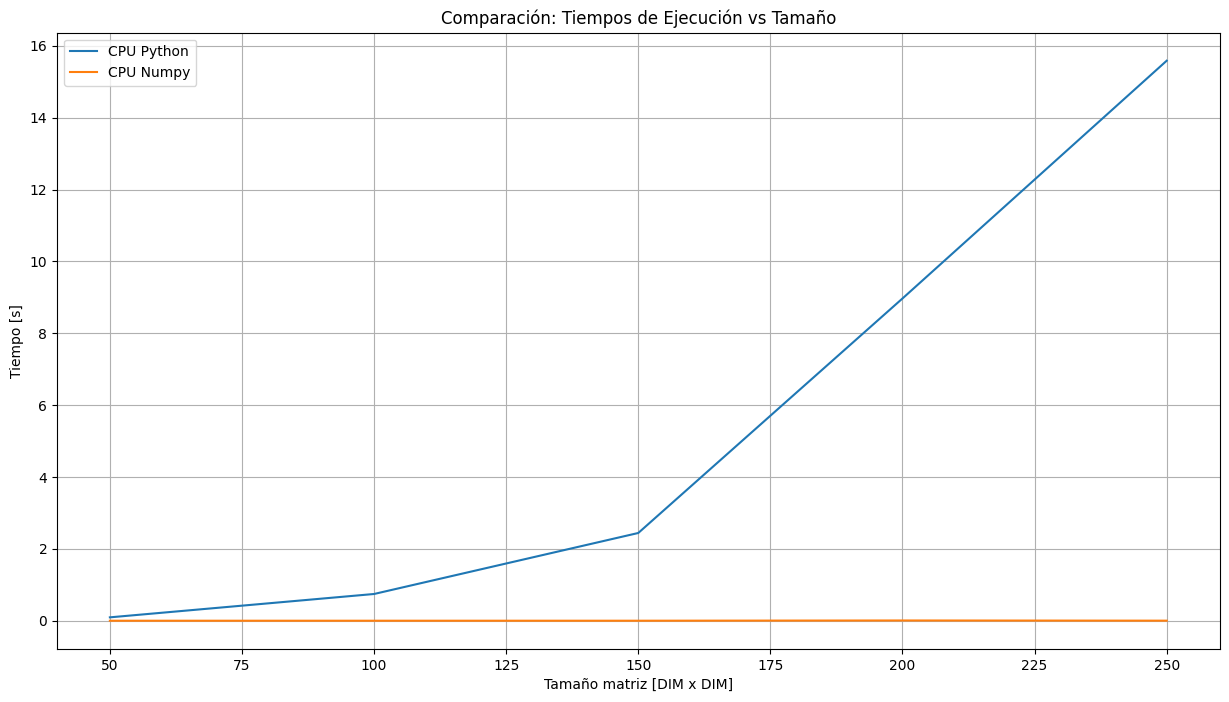

In [ ]:
t = list(range(TEST, TEST*STEPS, TEST))
plt.figure(figsize=(15, 8))
plt.plot(t, [i[1][0] for i in times], t, [i[1][1] for i in times])
plt.title('Comparación: Tiempos de Ejecución vs Tamaño')
plt.ylabel('Tiempo [s]')
plt.xlabel('Tamaño matriz [DIM x DIM]')
plt.legend(("CPU Python", "CPU Numpy"))
plt.grid(True)

# Referencias

*   [Numpy](https://numpy.org/doc/stable/index.html)
*   [Matplotlib](https://matplotlib.org/)